In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns

In [2]:
skin_df = pd.read_csv('OneDrive/Desktop/skin dataset/HAM10000_metadata.csv') # load in the data
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [4]:
skin_df['path'] = 'OneDrive/Desktop/skin dataset/images/'+skin_df['image_id']+'.jpg'
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,OneDrive/Desktop/skin dataset/images/ISIC_0027...,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,OneDrive/Desktop/skin dataset/images/ISIC_0025...,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,OneDrive/Desktop/skin dataset/images/ISIC_0026...,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,OneDrive/Desktop/skin dataset/images/ISIC_0025...,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,OneDrive/Desktop/skin dataset/images/ISIC_0031...,Benign keratosis-like lesions


In [5]:
lesion_danger = {
    'nv': 0, 
    'mel': 1, 
    'bkl': 0, 
    'bcc': 1, 
    'akiec': 1, 
    'vasc': 0,
    'df': 0
}
# 0 for benign
# 1 for malignant

In [6]:
skin_df["Malignant"] = skin_df["dx"].map(lesion_danger.get)
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,Malignant
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,OneDrive/Desktop/skin dataset/images/ISIC_0027...,Benign keratosis-like lesions,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,OneDrive/Desktop/skin dataset/images/ISIC_0025...,Benign keratosis-like lesions,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,OneDrive/Desktop/skin dataset/images/ISIC_0026...,Benign keratosis-like lesions,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,OneDrive/Desktop/skin dataset/images/ISIC_0025...,Benign keratosis-like lesions,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,OneDrive/Desktop/skin dataset/images/ISIC_0031...,Benign keratosis-like lesions,0


In [7]:
skin_df["cell_type_idx"] = pd.Categorical(skin_df["cell_type"]).codes # give each cell type a category id
skin_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,Malignant,cell_type_idx
2469,HAM_0006834,ISIC_0029193,bcc,histo,85.0,male,face,OneDrive/Desktop/skin dataset/images/ISIC_0029...,Basal cell carcinoma,1,1
2458,HAM_0004413,ISIC_0026068,vasc,consensus,55.0,female,abdomen,OneDrive/Desktop/skin dataset/images/ISIC_0026...,Vascular lesions,0,6
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,OneDrive/Desktop/skin dataset/images/ISIC_0029...,Benign keratosis-like lesions,0,2


<AxesSubplot:title={'center':'Benign vs Malignant'}>

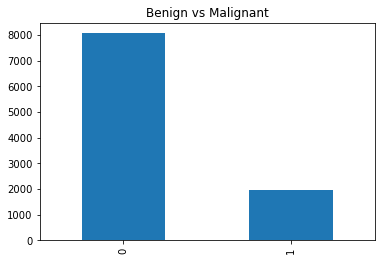

In [8]:
skin_df["Malignant"].value_counts().plot(kind="bar", title="Benign vs Malignant")

<AxesSubplot:title={'center':'Counts for each type of Lesions'}>

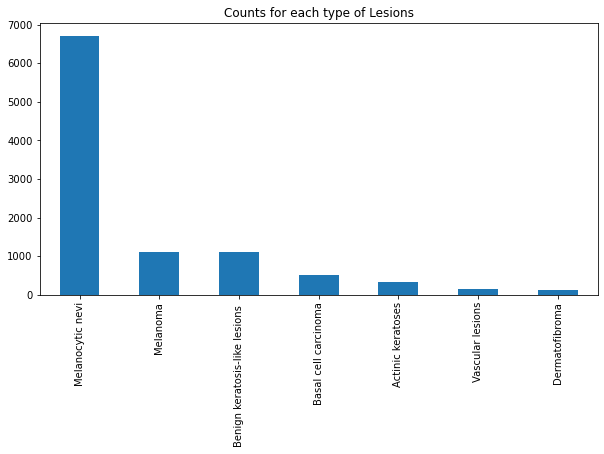

In [9]:
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
skin_df["cell_type"].value_counts().plot(kind="bar", ax=ax1, title="Counts for each type of Lesions")

<AxesSubplot:title={'center':'Location of Lesions'}>

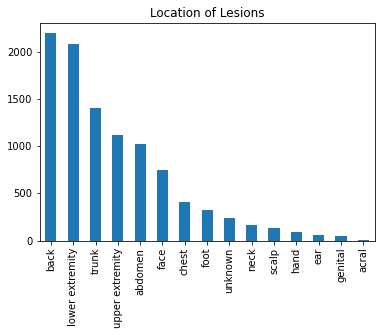

In [10]:
skin_df["localization"].value_counts().plot(kind='bar', title="Location of Lesions")

<AxesSubplot:title={'center':'Treatment received'}>

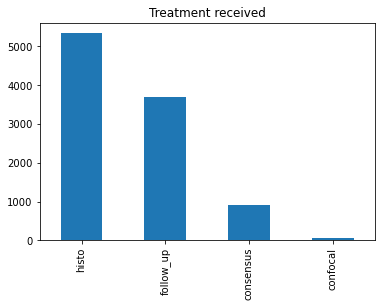

In [11]:
skin_df["dx_type"].value_counts().plot(kind='bar', title="Treatment received")

In [12]:
from skimage.io import imread
skin_df["image"] = skin_df["path"].map(imread)
skin_df.iloc[0]["image"]

array([[[188, 147, 191],
        [186, 148, 189],
        [187, 150, 191],
        ...,
        [196, 155, 171],
        [197, 156, 170],
        [197, 157, 168]],

       [[186, 149, 193],
        [187, 152, 194],
        [189, 153, 191],
        ...,
        [194, 156, 169],
        [195, 159, 169],
        [192, 159, 168]],

       [[185, 148, 192],
        [189, 152, 195],
        [190, 153, 196],
        ...,
        [196, 155, 169],
        [198, 157, 171],
        [194, 156, 169]],

       ...,

       [[157, 124, 155],
        [156, 121, 154],
        [159, 124, 154],
        ...,
        [177, 146, 161],
        [176, 144, 159],
        [175, 141, 155]],

       [[155, 122, 151],
        [156, 123, 154],
        [156, 123, 152],
        ...,
        [178, 147, 163],
        [175, 144, 159],
        [175, 142, 159]],

       [[154, 119, 151],
        [153, 120, 149],
        [154, 121, 152],
        ...,
        [176, 147, 167],
        [175, 147, 161],
        [173, 143, 155]]

In [13]:
skin_df["image"].map(lambda x: x.shape).value_counts() 

(450, 600, 3)    10015
Name: image, dtype: int64

In [14]:
from PIL import Image
reshaped_image = skin_df["path"].map(lambda x: np.asarray(Image.open(x).resize((28,28), resample=Image.LANCZOS).\
                                                          convert("RGB")).ravel())
out_vec = np.stack(reshaped_image, 0)
out_df = pd.DataFrame(out_vec)
out_df["label"] = skin_df["cell_type_idx"]
out_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [14]:
from PIL import Image
reshaped_image = skin_df["path"].map(lambda x: np.asarray(Image.open(x).resize((75,75), resample=Image.LANCZOS).\
                                                          convert("RGB")).ravel())
out_vec = np.stack(reshaped_image, 0)
out_df = pd.DataFrame(out_vec)
out_df["label"] = skin_df["cell_type_idx"]
out_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [15]:
out_path = "hmnist_28x28_RBG.csv"
out_df.to_csv(out_path, index=False)

In [16]:
img = Image.open(skin_df["path"][0])
img.size

(600, 450)

In [17]:
skin_df["cell_type"].unique()

array(['Benign keratosis-like lesions ', 'Melanocytic nevi',
       'Dermatofibroma', 'Melanoma', 'Vascular lesions',
       'Basal cell carcinoma', 'Actinic keratoses'], dtype=object)

C:\Users\chama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

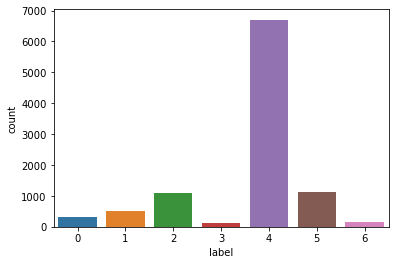

In [19]:
import seaborn as sns

sns.countplot(out_df['label'])

In [18]:
out_vec = out_vec.astype("float32")
out_vec /= 255
labels = skin_df["cell_type_idx"].values
from sklearn.model_selection import train_test_split
X_train_orig, X_test, y_train_orig, y_test = train_test_split(out_vec, labels, test_size=0.1,random_state=0)
np.save("256_192_test.npy", X_test)
np.save("test_labels.npy", y_test)
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.1, random_state=1)
np.save("256_192_val.npy", X_val)
np.save("val_labels.npy", y_val)
np.save("256_192_train.npy", X_train)
np.save("train_labels.npy", y_train)